In [1]:
import numpy as np
import awkward as ak
import uproot
import src.functions as fn
from pylab import cm
import matplotlib.pyplot as plt
import src.Network as net
import sys
import time
import hist
import scipy.stats
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
%matplotlib inline

import mplhep as hep

# Make plots look more HEP-like
plt.style.use(hep.style.ROOT)

In [3]:
fileName="/eos/user/c/chpapage/TICL_samples/CloseByDoubleGamma_E100Eta1p62Delta2_CMSSW_12_4_0_upgrade2026_D86_clue3Dv4_ntuples/220701_225819/0000/ntuples.root"
fileNameDelta2p5="/eos/user/c/chpapage/TICL_samples/CloseByDoubleGamma_E100Eta1p62Delta2p5_CMSSW_12_4_0_upgrade2026_D86_clue3Dv4_ntuples/220701_225832/0000/ntuples.root"
fileNameDelta3="/eos/user/c/chpapage/TICL_samples/CloseByDoubleGamma_E100Eta1p62Delta3_CMSSW_12_4_0_upgrade2026_D86_clue3Dv4_ntuples/220701_225846/0000/ntuples.root"
fileNameDelta5="/eos/user/c/chpapage/TICL_samples/CloseByDoubleGamma_E100Eta1p62Delta5_CMSSW_12_4_0_upgrade2026_D86_clue3Dv4_ntuples/220701_225928/0000/ntuples.root"
fileNameE50Delta2="/eos/user/c/chpapage/TICL_samples/CloseByDoubleGamma_E50Eta1p62Delta2_CMSSW_12_4_0_upgrade2026_D86_clue3Dv4_ntuples/220701_225716/0000/ntuples.root"
fileNameE50Delta2p5="/eos/user/c/chpapage/TICL_samples/CloseByDoubleGamma_E50Eta1p62Delta2p5_CMSSW_12_4_0_upgrade2026_D86_clue3Dv4_ntuples/220701_225726/0000/ntuples.root"
fileNameE50Delta3="/eos/user/c/chpapage/TICL_samples/CloseByDoubleGamma_E50Eta1p62Delta3_CMSSW_12_4_0_upgrade2026_D86_clue3Dv4_ntuples/220701_225737/0000/ntuples.root"
fileNameE50Delta5="/eos/user/c/chpapage/TICL_samples/CloseByDoubleGamma_E50Eta1p62Delta5_CMSSW_12_4_0_upgrade2026_D86_clue3Dv4_ntuples/220701_225808/0000/ntuples.root"
fileNameE25Delta2="/eos/user/c/chpapage/TICL_samples/CloseByDoubleGamma_E25Eta1p62Delta2_CMSSW_12_4_0_upgrade2026_D86_clue3Dv4_ntuples/220701_225611/0000/ntuples.root"
fileNameE25Delta2p5="/eos/user/c/chpapage/TICL_samples/CloseByDoubleGamma_E25Eta1p62Delta2p5_CMSSW_12_4_0_upgrade2026_D86_clue3Dv4_ntuples/220701_225623/0000/ntuples.root"
fileNameE25Delta3="/eos/user/c/chpapage/TICL_samples/CloseByDoubleGamma_E25Eta1p62Delta3_CMSSW_12_4_0_upgrade2026_D86_clue3Dv4_ntuples/220701_225633/0000/ntuples.root"
fileNameE25Delta5="/eos/user/c/chpapage/TICL_samples/CloseByDoubleGamma_E25Eta1p62Delta5_CMSSW_12_4_0_upgrade2026_D86_clue3Dv4_ntuples/220701_225704/0000/ntuples.root"

fileE100Delta2=uproot.open(fileName)
fileE100Delta2p5=uproot.open(fileNameDelta2p5)
fileE100Delta3=uproot.open(fileNameDelta3)
fileE100Delta5=uproot.open(fileNameDelta5)

fileE50Delta2=uproot.open(fileNameE50Delta2)
fileE50Delta2p5=uproot.open(fileNameE50Delta2p5)
fileE50Delta3=uproot.open(fileNameE50Delta3)
fileE50Delta5=uproot.open(fileNameE50Delta5)

fileE25Delta2=uproot.open(fileNameE25Delta2)
fileE25Delta2p5=uproot.open(fileNameE25Delta2p5)
fileE25Delta3=uproot.open(fileNameE25Delta3)
fileE25Delta5=uproot.open(fileNameE25Delta5)

In [4]:
trackstersE100D2=fileE100Delta2["ana/tracksters"]
trackstersE100D2p5=fileE100Delta2p5["ana/tracksters"]
trackstersE100D3=fileE100Delta3["ana/tracksters"]
trackstersE100D5=fileE100Delta5["ana/tracksters"]

trackstersE50D2=fileE50Delta2["ana/tracksters"]
trackstersE50D5=fileE50Delta5["ana/tracksters"]
trackstersE50D2p5=fileE50Delta2p5["ana/tracksters"]
trackstersE50D3=fileE50Delta3["ana/tracksters"]

trackstersE25D2=fileE25Delta2["ana/tracksters"]
trackstersE25D5=fileE25Delta5["ana/tracksters"]
trackstersE25D2p5=fileE25Delta2p5["ana/tracksters"]
trackstersE25D3=fileE25Delta3["ana/tracksters"]

In [5]:
tracksters=fileE100Delta2["ana/tracksters"]
vertices_E = tracksters['vertices_energy'].array()
vertices_indexes = tracksters['vertices_indexes'].array()
vertices_x = tracksters['vertices_x'].array()
vertices_y = tracksters['vertices_y'].array()
vertices_z = tracksters['vertices_z'].array()
hitsD2_x = tracksters['recHits_x'].array()
hitsD2_y = tracksters['recHits_y'].array()
hitsD2_z = tracksters['recHits_z'].array()
vertices_layers=tracksters['vertices_layer'].array()
trackster_E=tracksters['raw_energy'].array()
trackster_phi=tracksters['trackster_barycenter_phi'].array()
trackster_eta=tracksters['trackster_barycenter_eta'].array()

trackstersD2p5=fileE50Delta2p5["ana/tracksters"]
verticesD2p5_E = trackstersD2p5['vertices_energy'].array()
verticesD2p5_indexes = trackstersD2p5['vertices_indexes'].array()
verticesD2p5_x = trackstersD2p5['vertices_x'].array()
verticesD2p5_y = trackstersD2p5['vertices_y'].array()
verticesD2p5_z = trackstersD2p5['vertices_z'].array()
hitsD2p5_x = trackstersD2p5['recHits_x'].array()
hitsD2p5_y = trackstersD2p5['recHits_y'].array()
hitsD2p5_z = trackstersD2p5['recHits_z'].array()
hitsD2p5_E = trackstersD2p5['recHits_energy'].array()
verticesD2p5_layers=trackstersD2p5['vertices_layer'].array()
tracksterD2p5_E=trackstersD2p5['raw_energy'].array()
tracksterD2p5_phi=trackstersD2p5['trackster_barycenter_phi'].array()
tracksterD2p5_eta=trackstersD2p5['trackster_barycenter_eta'].array()

trackstersD3=fileE50Delta3["ana/tracksters"]
verticesD3_E = trackstersD3['vertices_energy'].array()
verticesD3_indexes = trackstersD3['vertices_indexes'].array()
tracksterD3_E=trackstersD3['raw_energy'].array()


trackstersD5=fileE100Delta5["ana/tracksters"]
verticesD5_E = trackstersD5['vertices_energy'].array()
verticesD5_indexes = trackstersD5['vertices_indexes'].array()
verticesD5_x = trackstersD5['vertices_x'].array()
verticesD5_y = trackstersD5['vertices_y'].array()
verticesD5_z = trackstersD5['vertices_z'].array()
hitsD5_x = trackstersD5['recHits_x'].array()
hitsD5_y = trackstersD5['recHits_y'].array()
hitsD5_z = trackstersD5['recHits_z'].array()
hitsD5_E = trackstersD5['recHits_energy'].array()
verticesD5_layers=trackstersD5['vertices_layer'].array()
tracksterD5_E=trackstersD5['raw_energy'].array()
tracksterD5_EReg=trackstersD5['regressed_energy'].array()
tracksterD5_phi=trackstersD5['trackster_barycenter_phi'].array()
tracksterD5_eta=trackstersD5['trackster_barycenter_eta'].array()

trackstersE50D2=fileE50Delta2["ana/tracksters"]
verticesE50D2_E = trackstersE50D2['vertices_energy'].array()
verticesE50D2_indexes = trackstersE50D2['vertices_indexes'].array()
tracksterE50D2_E=trackstersE50D2['raw_energy'].array()
verticesE50D2_x = trackstersE50D2['vertices_x'].array()
verticesE50D2_y = trackstersE50D2['vertices_y'].array()
verticesE50D2_z = trackstersE50D2['vertices_z'].array()
hitsE50D2_x = trackstersE50D2['recHits_x'].array()
hitsE50D2_y = trackstersE50D2['recHits_y'].array()
hitsE50D2_z = trackstersE50D2['recHits_z'].array()
hitsE50D2_E = trackstersE50D2['recHits_energy'].array()
#vertices_layers=tracksters['vertices_layer'].array()
tracksterE50D2_phi=trackstersE50D2['trackster_barycenter_phi'].array()
tracksterE50D2_eta=trackstersE50D2['trackster_barycenter_eta'].array()

trackstersE50D5=fileE50Delta5["ana/tracksters"]
verticesE50D5_E = trackstersE50D5['vertices_energy'].array()
verticesE50D5_indexes = trackstersE50D5['vertices_indexes'].array()
tracksterE50D5_E=trackstersE50D5['raw_energy'].array()


In [14]:
def delta_Eta(vertices_x,vertices_y,vertices_z):
    theta=np.arctan(np.sqrt(vertices_x**2+vertices_y**2)/vertices_z)
    #print(theta)
    #print(np.tan(theta/2))
    eta=-np.log(np.tan(theta/2))
    #print(eta)
    return eta

def delta_Phi(vertices_x,vertices_y):
    phi=np.arctan2(vertices_y,vertices_x)
    
    return phi

def delta_eta_phi(vertices_x,vertices_y,vertices_z,barycenter_eta,barycenter_phi):
    Phi=delta_Phi(vertices_x,vertices_y)
    Eta=delta_Eta(vertices_x,vertices_y,vertices_z)
    dR=np.sqrt((Eta-barycenter_eta)**2+(Phi-barycenter_phi)**2)
    #barycenter_R=np.sqrt(barycenter_eta**2+barycenter_phi**2)
    return np.mean(dR)

def delta_eta_phi_EW(vertices_x,vertices_y,vertices_z,barycenter_eta,barycenter_phi,vertices_E):
    Phi=delta_Phi(vertices_x,vertices_y)
    Eta=delta_Eta(vertices_x,vertices_y,vertices_z)
    dR=np.sqrt((Eta-barycenter_eta)**2+(Phi-barycenter_phi)**2)
    #barycenter_R=np.sqrt(barycenter_eta**2+barycenter_phi**2)
    return np.mean(dR*vertices_E)/sum(vertices_E)

def computeDeltas(tracksters):
    Deltas=[]
    v_E = tracksters['vertices_energy'].array()
    v_ind = tracksters['vertices_indexes'].array()
    v_x = tracksters['vertices_x'].array()
    v_y = tracksters['vertices_y'].array()
    v_z = tracksters['vertices_z'].array()
    h_x = tracksters['recHits_x'].array()
    h_y = tracksters['recHits_y'].array()
    h_z = tracksters['recHits_z'].array()
    h_E = tracksters['recHits_energy'].array()
    v_layers=tracksters['vertices_layer'].array()
    tr_E=tracksters['raw_energy'].array()
    tr_phi=tracksters['trackster_barycenter_phi'].array()
    tr_eta=tracksters['trackster_barycenter_eta'].array()
    for evt in range(len(v_ind)):
        
        for tr in range(min(len(v_ind[evt]),2)):
            print(evt,tr)
            
            #print(v_E_inc)
            if(len(v_ind[evt,tr])<2):
                continue
            if(sum(v_E[evt,tr])<2):
                continue

            Deltas.append([
                delta_eta_phi(v_x[evt,tr],v_y[evt,tr],v_z[evt,tr],tr_eta[evt,tr],tr_phi[evt,tr])
                ,delta_eta_phi_EW(v_x[evt,tr],v_y[evt,tr],v_z[evt,tr],tr_eta[evt,tr],tr_phi[evt,tr],v_E[evt,tr])
                ,delta_eta_phi(h_x[evt,tr],h_y[evt,tr],h_z[evt,tr],tr_eta[evt,tr],tr_phi[evt,tr])
                ,delta_eta_phi_EW(h_x[evt,tr],h_y[evt,tr],h_z[evt,tr],tr_eta[evt,tr],tr_phi[evt,tr],h_E[evt,tr])
            ])
    
    return np.asarray(Deltas)

In [15]:
DeltasE100D2=computeDeltas(trackstersE100D2)
DeltasE100D2p5=computeDeltas(trackstersE100D2p5)
DeltasE100D3=computeDeltas(trackstersE100D3)
DeltasE100D5=computeDeltas(trackstersE100D5)

0 0
0 1
1 0
2 0
3 0
3 1
4 0
5 0
6 0
7 0
7 1
8 0
9 0
10 0
10 1
11 0
12 0
13 0
14 0
15 0
16 0
17 0
17 1
18 0
19 0
19 1
20 0
20 1
21 0
21 1
22 0
22 1
23 0
24 0
25 0
25 1
26 0
26 1
27 0
28 0
29 0
29 1
30 0
31 0
32 0
33 0
33 1
34 0
34 1
35 0
36 0
36 1
37 0
38 0
39 0
40 0
40 1
41 0
42 0
43 0
44 0
44 1
45 0
45 1
46 0
47 0
47 1
48 0
49 0
50 0
51 0
51 1
52 0
53 0
54 0
55 0
56 0
57 0
57 1
58 0
59 0
59 1
60 0
60 1
61 0
61 1
62 0
63 0
64 0
65 0
66 0
66 1
67 0
68 0
69 0
69 1
70 0
70 1
71 0
72 0
73 0
73 1
74 0
75 0
76 0
76 1
77 0
78 0
78 1
79 0
80 0
81 0
81 1
82 0
83 0
84 0
85 0
85 1
86 0
87 0
87 1
88 0
88 1
89 0
89 1
90 0
91 0
92 0
92 1
93 0
94 0
95 0
96 0
96 1
97 0
98 0
98 1
99 0
100 0
100 1
101 0
101 1
102 0
103 0
103 1
104 0
104 1
105 0
106 0
106 1
107 0
108 0
109 0
109 1
110 0
110 1
111 0
112 0
112 1
113 0
114 0
114 1
115 0
116 0
117 0
117 1
118 0
118 1
119 0
119 1
120 0
121 0
122 0
122 1
123 0
124 0
125 0
125 1
126 0
127 0
128 0
129 0
130 0
130 1
131 0
131 1
132 0
132 1
133 0
134 0
134 1
135 0

405 0
405 1
406 0
406 1
407 0
407 1
408 0
408 1
409 0
409 1
410 0
410 1
411 0
411 1
412 0
412 1
413 0
413 1
414 0
414 1
415 0
415 1
416 0
416 1
417 0
417 1
418 0
418 1
419 0
419 1
420 0
420 1
421 0
421 1
422 0
422 1
423 0
423 1
424 0
425 0
425 1
426 0
426 1
427 0
427 1
428 0
428 1
429 0
429 1
430 0
430 1
431 0
431 1
432 0
432 1
433 0
433 1
434 0
434 1
435 0
435 1
436 0
436 1
437 0
437 1
438 0
438 1
439 0
439 1
440 0
440 1
441 0
441 1
442 0
442 1
443 0
443 1
444 0
444 1
445 0
445 1
446 0
446 1
447 0
447 1
448 0
448 1
449 0
449 1
450 0
450 1
451 0
451 1
452 0
452 1
453 0
453 1
454 0
454 1
455 0
455 1
456 0
456 1
457 0
457 1
458 0
458 1
459 0
459 1
460 0
460 1
461 0
461 1
462 0
462 1
463 0
463 1
464 0
464 1
465 0
465 1
466 0
466 1
467 0
467 1
468 0
468 1
469 0
469 1
470 0
470 1
471 0
471 1
472 0
472 1
473 0
473 1
474 0
474 1
475 0
475 1
476 0
476 1
477 0
477 1
478 0
478 1
479 0
479 1
480 0
480 1
481 0
481 1
482 0
482 1
483 0
483 1
484 0
484 1
485 0
485 1
486 0
486 1
487 0
487 1
488 0
488 

125 1
126 0
126 1
127 0
127 1
128 0
128 1
129 0
129 1
130 0
130 1
131 0
131 1
132 0
132 1
133 0
133 1
134 0
134 1
135 0
135 1
136 0
136 1
137 0
137 1
138 0
138 1
139 0
139 1
140 0
140 1
141 0
141 1
142 0
142 1
143 0
143 1
144 0
144 1
145 0
145 1
146 0
146 1
147 0
147 1
148 0
148 1
149 0
149 1
150 0
150 1
151 0
151 1
152 0
152 1
153 0
153 1
154 0
154 1
155 0
155 1
156 0
156 1
157 0
157 1
158 0
158 1
159 0
159 1
160 0
160 1
161 0
161 1
162 0
162 1
163 0
163 1
164 0
164 1
165 0
165 1
166 0
166 1
167 0
167 1
168 0
168 1
169 0
169 1
170 0
170 1
171 0
171 1
172 0
172 1
173 0
173 1
174 0
174 1
175 0
175 1
176 0
176 1
177 0
177 1
178 0
178 1
179 0
179 1
180 0
180 1
181 0
181 1
182 0
182 1
183 0
183 1
184 0
184 1
185 0
185 1
186 0
186 1
187 0
187 1
188 0
188 1
189 0
189 1
190 0
190 1
191 0
191 1
192 0
192 1
193 0
193 1
194 0
194 1
195 0
195 1
196 0
196 1
197 0
197 1
198 0
198 1
199 0
199 1
200 0
200 1
201 0
201 1
202 0
202 1
203 0
203 1
204 0
204 1
205 0
205 1
206 0
206 1
207 0
207 1
208 0
208 

In [16]:
DeltasE50D3=computeDeltas(trackstersE50D3)
DeltasE50D2p5=computeDeltas(trackstersE50D2p5)
DeltasE50D2=computeDeltas(trackstersE50D2)
DeltasE50D5=computeDeltas(trackstersE50D5)

0 0
0 1
1 0
1 1
2 0
2 1
3 0
3 1
4 0
4 1
5 0
5 1
6 0
6 1
7 0
7 1
8 0
8 1
9 0
9 1
10 0
10 1
11 0
11 1
12 0
12 1
13 0
13 1
14 0
14 1
15 0
15 1
16 0
16 1
17 0
17 1
18 0
18 1
19 0
19 1
20 0
20 1
21 0
21 1
22 0
22 1
23 0
23 1
24 0
24 1
25 0
25 1
26 0
26 1
27 0
27 1
28 0
28 1
29 0
29 1
30 0
30 1
31 0
31 1
32 0
32 1
33 0
33 1
34 0
34 1
35 0
35 1
36 0
36 1
37 0
37 1
38 0
38 1
39 0
39 1
40 0
40 1
41 0
41 1
42 0
42 1
43 0
43 1
44 0
44 1
45 0
45 1
46 0
46 1
47 0
47 1
48 0
48 1
49 0
49 1
50 0
50 1
51 0
51 1
52 0
52 1
53 0
53 1
54 0
54 1
55 0
55 1
56 0
56 1
57 0
57 1
58 0
58 1
59 0
59 1
60 0
60 1
61 0
61 1
62 0
62 1
63 0
63 1
64 0
64 1
65 0
65 1
66 0
66 1
67 0
67 1
68 0
68 1
69 0
69 1
70 0
70 1
71 0
71 1
72 0
72 1
73 0
73 1
74 0
74 1
75 0
75 1
76 0
76 1
77 0
77 1
78 0
78 1
79 0
79 1
80 0
80 1
81 0
81 1
82 0
82 1
83 0
83 1
84 0
84 1
85 0
85 1
86 0
86 1
87 0
87 1
88 0
88 1
89 0
89 1
90 0
90 1
91 0
91 1
92 0
92 1
93 0
93 1
94 0
94 1
95 0
95 1
96 0
96 1
97 0
97 1
98 0
98 1
99 0
99 1
100 0
100 1
101 0
10

223 1
224 0
224 1
225 0
225 1
226 0
226 1
227 0
227 1
228 0
228 1
229 0
229 1
230 0
230 1
231 0
231 1
232 0
232 1
233 0
233 1
234 0
234 1
235 0
235 1
236 0
236 1
237 0
237 1
238 0
238 1
239 0
239 1
240 0
240 1
241 0
241 1
242 0
242 1
243 0
243 1
244 0
244 1
245 0
245 1
246 0
246 1
247 0
247 1
248 0
249 0
249 1
250 0
250 1
251 0
251 1
252 0
252 1
253 0
253 1
254 0
255 0
255 1
256 0
256 1
257 0
257 1
258 0
258 1
259 0
259 1
260 0
260 1
261 0
261 1
262 0
262 1
263 0
263 1
264 0
264 1
265 0
265 1
266 0
266 1
267 0
267 1
268 0
268 1
269 0
269 1
270 0
270 1
271 0
271 1
272 0
272 1
273 0
273 1
274 0
274 1
275 0
275 1
276 0
276 1
277 0
277 1
278 0
278 1
279 0
279 1
280 0
280 1
281 0
281 1
282 0
282 1
283 0
283 1
284 0
284 1
285 0
285 1
286 0
286 1
287 0
287 1
288 0
288 1
289 0
289 1
290 0
290 1
291 0
291 1
292 0
292 1
293 0
293 1
294 0
294 1
295 0
295 1
296 0
296 1
297 0
297 1
298 0
298 1
299 0
299 1
300 0
300 1
301 0
301 1
302 0
302 1
303 0
303 1
304 0
304 1
305 0
305 1
306 0
306 1
307 0
307 

109 0
109 1
110 0
110 1
111 0
111 1
112 0
112 1
113 0
113 1
114 0
114 1
115 0
115 1
116 0
116 1
117 0
117 1
118 0
118 1
119 0
119 1
120 0
120 1
121 0
121 1
122 0
122 1
123 0
123 1
124 0
124 1
125 0
125 1
126 0
126 1
127 0
127 1
128 0
128 1
129 0
129 1
130 0
130 1
131 0
131 1
132 0
132 1
133 0
133 1
134 0
134 1
135 0
135 1
136 0
136 1
137 0
137 1
138 0
138 1
139 0
139 1
140 0
140 1
141 0
141 1
142 0
142 1
143 0
143 1
144 0
144 1
145 0
145 1
146 0
146 1
147 0
147 1
148 0
148 1
149 0
149 1
150 0
150 1
151 0
151 1
152 0
152 1
153 0
153 1
154 0
154 1
155 0
155 1
156 0
156 1
157 0
157 1
158 0
158 1
159 0
159 1
160 0
160 1
161 0
161 1
162 0
162 1
163 0
163 1
164 0
164 1
165 0
165 1
166 0
166 1
167 0
167 1
168 0
168 1
169 0
169 1
170 0
170 1
171 0
171 1
172 0
172 1
173 0
173 1
174 0
174 1
175 0
175 1
176 0
176 1
177 0
177 1
178 0
178 1
179 0
179 1
180 0
180 1
181 0
181 1
182 0
182 1
183 0
183 1
184 0
184 1
185 0
185 1
186 0
186 1
187 0
187 1
188 0
188 1
189 0
189 1
190 0
190 1
191 0
191 1
192 

In [17]:
DeltasE25D5=computeDeltas(trackstersE25D5)
DeltasE25D2=computeDeltas(trackstersE25D2)
DeltasE25D2p5=computeDeltas(trackstersE25D2p5)
DeltasE25D3=computeDeltas(trackstersE25D3)

0 0
0 1
1 0
1 1
2 0
2 1
3 0
3 1
4 0
4 1
5 0
5 1
6 0
6 1
7 0
7 1
8 0
8 1
9 0
9 1
10 0
10 1
11 0
11 1
12 0
12 1
13 0
13 1
14 0
14 1
15 0
15 1
16 0
16 1
17 0
17 1
18 0
18 1
19 0
19 1
20 0
20 1
21 0
21 1
22 0
22 1
23 0
23 1
24 0
24 1
25 0
25 1
26 0
26 1
27 0
27 1
28 0
28 1
29 0
29 1
30 0
30 1
31 0
31 1
32 0
32 1
33 0
33 1
34 0
34 1
35 0
35 1
36 0
36 1
37 0
37 1
38 0
38 1
39 0
39 1
40 0
40 1
41 0
41 1
42 0
42 1
43 0
43 1
44 0
44 1
45 0
45 1
46 0
46 1
47 0
47 1
48 0
48 1
49 0
49 1
50 0
50 1
51 0
51 1
52 0
52 1
53 0
53 1
54 0
54 1
55 0
55 1
56 0
56 1
57 0
57 1
58 0
58 1
59 0
59 1
60 0
60 1
61 0
61 1
62 0
62 1
63 0
63 1
64 0
64 1
65 0
65 1
66 0
66 1
67 0
67 1
68 0
68 1
69 0
69 1
70 0
70 1
71 0
71 1
72 0
72 1
73 0
73 1
74 0
74 1
75 0
75 1
76 0
76 1
77 0
77 1
78 0
78 1
79 0
79 1
80 0
80 1
81 0
81 1
82 0
82 1
83 0
83 1
84 0
84 1
85 0
85 1
86 0
86 1
87 0
87 1
88 0
88 1
89 0
89 1
90 0
90 1
91 0
91 1
92 0
92 1
93 0
93 1
94 0
94 1
95 0
95 1
96 0
96 1
97 0
97 1
98 0
98 1
99 0
99 1
100 0
100 1
101 0
10

338 1
339 0
340 0
341 0
342 0
343 0
344 0
345 0
346 0
347 0
348 0
349 0
350 0
351 0
351 1
352 0
353 0
354 0
355 0
355 1
356 0
357 0
357 1
358 0
359 0
360 0
361 0
362 0
362 1
363 0
364 0
364 1
365 0
366 0
367 0
368 0
369 0
370 0
371 0
372 0
373 0
373 1
374 0
375 0
376 0
377 0
378 0
379 0
380 0
380 1
381 0
382 0
383 0
384 0
385 0
386 0
387 0
388 0
389 0
389 1
390 0
391 0
392 0
393 0
394 0
395 0
396 0
397 0
398 0
398 1
399 0
399 1
400 0
400 1
401 0
402 0
403 0
404 0
405 0
406 0
407 0
408 0
409 0
410 0
411 0
411 1
412 0
413 0
414 0
414 1
415 0
416 0
416 1
417 0
418 0
419 0
420 0
421 0
422 0
422 1
423 0
424 0
425 0
426 0
427 0
428 0
429 0
430 0
431 0
432 0
432 1
433 0
433 1
434 0
434 1
435 0
436 0
437 0
437 1
438 0
439 0
440 0
441 0
442 0
443 0
444 0
444 1
445 0
445 1
446 0
447 0
448 0
449 0
450 0
451 0
451 1
452 0
452 1
453 0
453 1
454 0
454 1
455 0
456 0
457 0
458 0
459 0
460 0
460 1
461 0
461 1
462 0
463 0
463 1
464 0
465 0
466 0
466 1
467 0
468 0
469 0
470 0
471 0
472 0
472 1
473 0
474 

174 1
175 0
175 1
176 0
176 1
177 0
177 1
178 0
178 1
179 0
179 1
180 0
180 1
181 0
181 1
182 0
182 1
183 0
183 1
184 0
184 1
185 0
185 1
186 0
186 1
187 0
187 1
188 0
188 1
189 0
189 1
190 0
190 1
191 0
191 1
192 0
192 1
193 0
193 1
194 0
194 1
195 0
195 1
196 0
196 1
197 0
197 1
198 0
198 1
199 0
199 1
200 0
200 1
201 0
201 1
202 0
202 1
203 0
203 1
204 0
204 1
205 0
205 1
206 0
206 1
207 0
207 1
208 0
208 1
209 0
209 1
210 0
210 1
211 0
211 1
212 0
212 1
213 0
213 1
214 0
214 1
215 0
215 1
216 0
216 1
217 0
217 1
218 0
218 1
219 0
219 1
220 0
220 1
221 0
221 1
222 0
222 1
223 0
223 1
224 0
224 1
225 0
225 1
226 0
226 1
227 0
227 1
228 0
228 1
229 0
229 1
230 0
230 1
231 0
231 1
232 0
232 1
233 0
233 1
234 0
234 1
235 0
235 1
236 0
236 1
237 0
237 1
238 0
238 1
239 0
239 1
240 0
240 1
241 0
241 1
242 0
242 1
243 0
243 1
244 0
244 1
245 0
245 1
246 0
246 1
247 0
247 1
248 0
248 1
249 0
249 1
250 0
250 1
251 0
251 1
252 0
252 1
253 0
253 1
254 0
254 1
255 0
255 1
256 0
256 1
257 0
257 

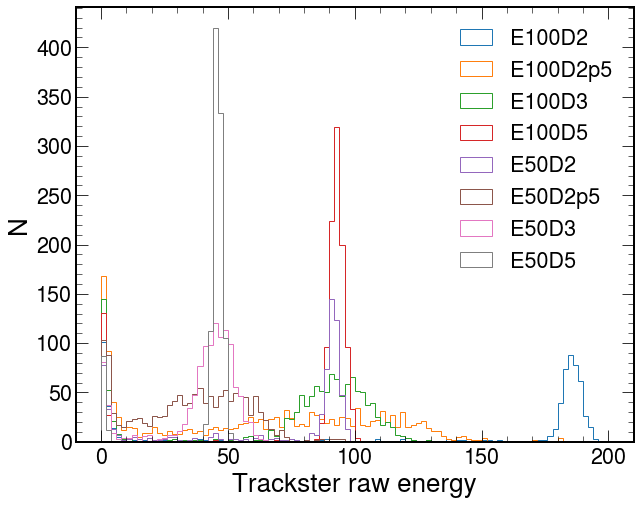

In [8]:
#%matplotlib inline
plt.figure(figsize=(10,8))
plt.hist(ak.flatten(trackster_E),bins=100,range=(0,200),histtype="step",label="E100D2")
plt.hist(ak.flatten(trackstersE100D2p5['raw_energy'].array()),bins=100,range=(0,200),histtype="step",label="E100D2p5")
plt.hist(ak.flatten(trackstersE100D3['raw_energy'].array()),bins=100,range=(0,200),histtype="step",label="E100D3")
plt.hist(ak.flatten(tracksterD5_E),bins=100,range=(0,200),histtype="step",label="E100D5")
plt.hist(ak.flatten(tracksterE50D2_E),bins=100,range=(0,200),histtype="step",label="E50D2")
plt.hist(ak.flatten(tracksterD2p5_E),bins=100,range=(0,200),histtype="step",label="E50D2p5")
plt.hist(ak.flatten(tracksterD3_E),bins=100,range=(0,200),histtype="step",label="E50D3")
plt.hist(ak.flatten(tracksterE50D5_E),bins=100,range=(0,200),histtype="step",label="E50D5")
#plt.hist(ak.flatten(tracksterD2p5_E),bins=50,histtype="step",label="E50D2p5")
plt.ylabel("N")
plt.xlabel("Trackster raw energy")
plt.legend()
plt.savefig("/eos/user/d/dmagdali/figures/"+"MergeE100and50_TotalRawenergy.png")

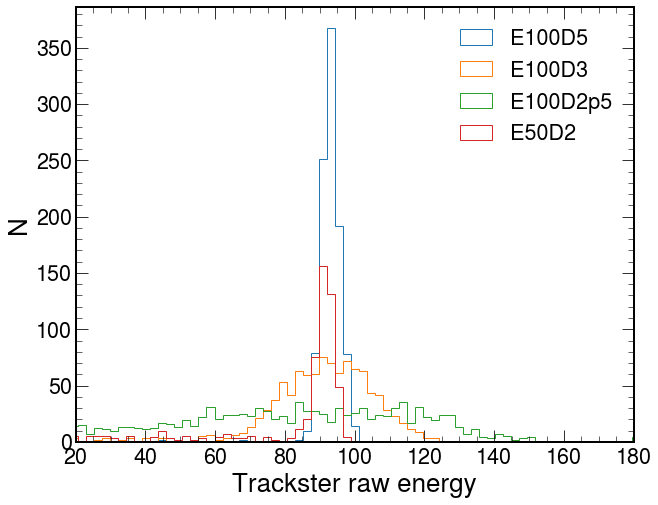

In [7]:
#%matplotlib inline
plt.figure(figsize=(10,8))
#plt.hist(ak.flatten(trackstersE100D2['regressed_energy'].array()),bins=100,range=(0,230),histtype="step",label="E100D2")
plt.hist(ak.flatten(trackstersE100D5['raw_energy'].array()),bins=100,range=(0,230),histtype="step",label="E100D5")
plt.hist(ak.flatten(trackstersE100D3['raw_energy'].array()),bins=100,range=(0,230),histtype="step",label="E100D3")
plt.hist(ak.flatten(trackstersE100D2p5['raw_energy'].array()),bins=100,range=(0,230),histtype="step",label="E100D2p5")
plt.hist(ak.flatten(trackstersE50D2['raw_energy'].array()),bins=100,range=(0,230),histtype="step",label="E50D2")
#plt.hist(ak.flatten(trackstersE50D2p5['regressed_energy'].array()),bins=100,range=(0,230),histtype="step",label="E50D2p5")
#plt.hist(ak.flatten(trackstersE50D3['regressed_energy'].array()),bins=100,range=(0,230),histtype="step",label="E50D3")
#plt.hist(ak.flatten(trackstersE50D5['regressed_energy'].array()),bins=100,range=(0,230),histtype="step",label="E50D5")
#plt.hist(ak.flatten(tracksterD2p5_E),bins=50,histtype="step",label="E50D2p5")
plt.ylabel("N")
plt.xlabel("Trackster raw energy")
plt.legend()
plt.xlim(20,180)
#plt.show()
plt.savefig("/eos/user/d/dmagdali/figures/"+"MergeE100D5.3.2p5andE50D2_TotalRawEnergy.png")

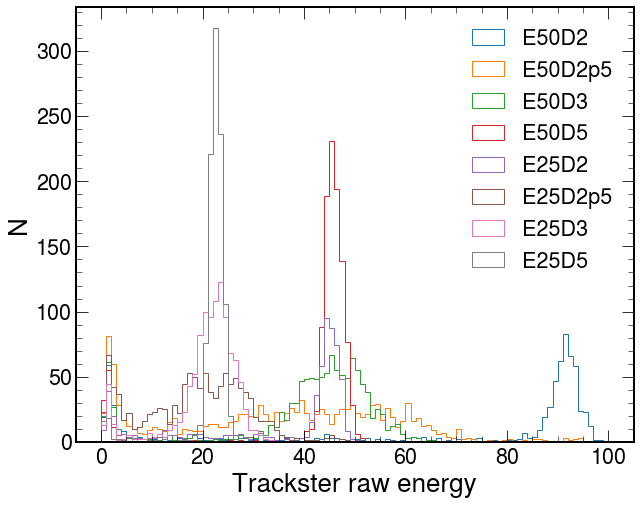

In [10]:
plt.figure(figsize=(10,8))
plt.hist(ak.flatten(tracksterE50D2_E),bins=100,range=(0,100),histtype="step",label="E50D2")
plt.hist(ak.flatten(tracksterD2p5_E),bins=100,range=(0,100),histtype="step",label="E50D2p5")
plt.hist(ak.flatten(tracksterD3_E),bins=100,range=(0,100),histtype="step",label="E50D3")
plt.hist(ak.flatten(tracksterE50D5_E),bins=100,range=(0,100),histtype="step",label="E50D5")
plt.hist(ak.flatten(trackstersE25D2['raw_energy'].array()),bins=100,range=(0,100),histtype="step",label="E25D2")
plt.hist(ak.flatten(trackstersE25D2p5['raw_energy'].array()),bins=100,range=(0,100),histtype="step",label="E25D2p5")
plt.hist(ak.flatten(trackstersE25D3['raw_energy'].array()),bins=100,range=(0,100),histtype="step",label="E25D3")
plt.hist(ak.flatten(trackstersE25D5['raw_energy'].array()),bins=100,range=(0,100),histtype="step",label="E25D5")
plt.ylabel("N")
plt.xlabel("Trackster raw energy")
plt.legend()
#plt.show()
plt.savefig("/eos/user/d/dmagdali/figures/"+"MergeE50and25_TotalRawEnergy.png")

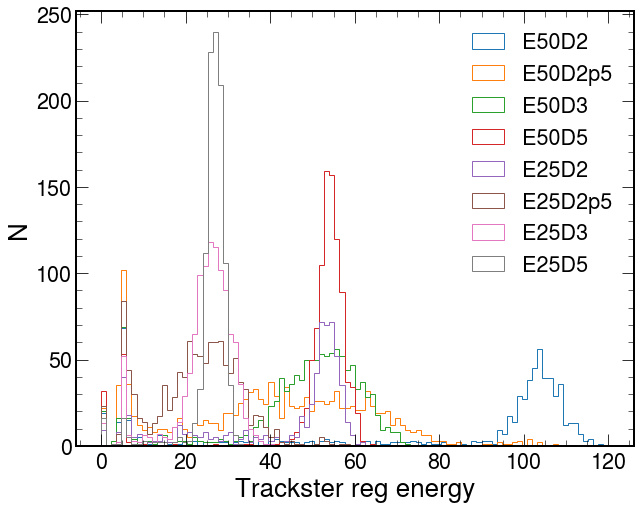

In [13]:
#%matplotlib inline
plt.figure(figsize=(10,8))
plt.hist(ak.flatten(trackstersE50D2['regressed_energy'].array()),bins=100,range=(0,120),histtype="step",label="E50D2")
plt.hist(ak.flatten(trackstersE50D2p5['regressed_energy'].array()),bins=100,range=(0,120),histtype="step",label="E50D2p5")
plt.hist(ak.flatten(trackstersE50D3['regressed_energy'].array()),bins=100,range=(0,120),histtype="step",label="E50D3")
plt.hist(ak.flatten(trackstersE50D5['regressed_energy'].array()),bins=100,range=(0,120),histtype="step",label="E50D5")
plt.hist(ak.flatten(trackstersE25D2['regressed_energy'].array()),bins=100,range=(0,120),histtype="step",label="E25D2")
plt.hist(ak.flatten(trackstersE25D2p5['regressed_energy'].array()),bins=100,range=(0,120),histtype="step",label="E25D2p5")
plt.hist(ak.flatten(trackstersE25D3['regressed_energy'].array()),bins=100,range=(0,120),histtype="step",label="E25D3")
plt.hist(ak.flatten(trackstersE25D5['regressed_energy'].array()),bins=100,range=(0,120),histtype="step",label="E25D5")
#plt.hist(ak.flatten(tracksterD2p5_E),bins=50,histtype="step",label="E50D2p5")
plt.ylabel("N")
plt.xlabel("Trackster reg energy")
plt.legend()
#plt.show()
plt.savefig("/eos/user/d/dmagdali/figures/"+"MergeE50and25_TotalRegenergy.png")

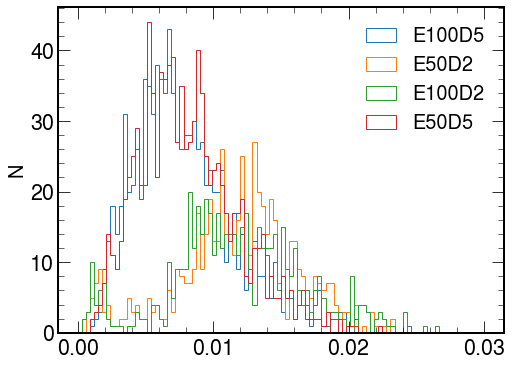

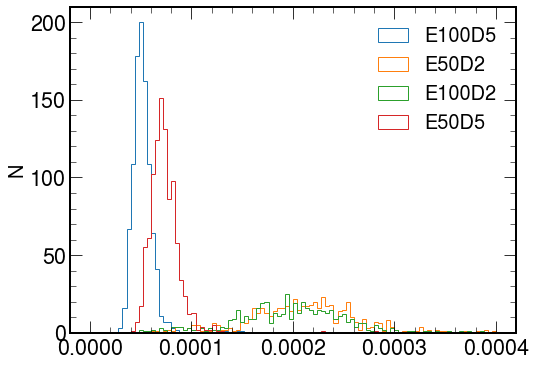

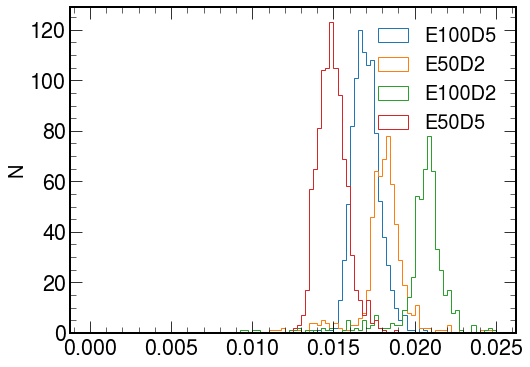

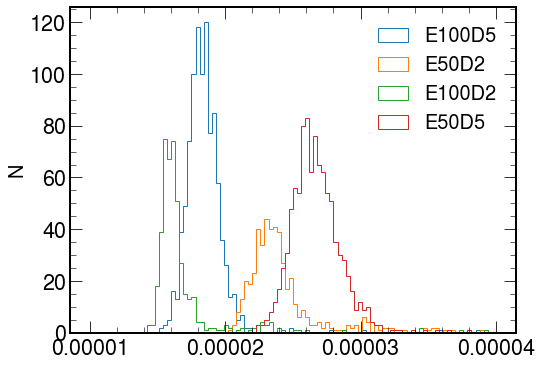

In [14]:
plt.figure(figsize=(8,6))
plt.hist(DeltasE100D5[:,-4], histtype="step",bins=100,range=(0,0.03),label='E100D5')
plt.hist(DeltasE50D2[:,-4], histtype="step",bins=100,range=(0,0.03), label='E50D2')
plt.hist(DeltasE100D2[:,-4], histtype="step",bins=100,range=(0,0.03),label='E100D2')
plt.hist(DeltasE50D5[:,-4], histtype="step",bins=100,range=(0,0.03),label='E50D5')
plt.legend(fontsize=20)
plt.ylabel("N",fontsize=20)
#plt.xlabel(xlabels[i],fontsize=20)
#plt.title(datasetName,fontsize=20)
#plt.xlim(min(completeShowerShapes[:,i]-5),max(completeShowerShapes[:,i]+5))
#if(savefigs):
#    plt.savefig("figures/"+folder+"/"+saveFileNames[i]+".png")
plt.show()

plt.figure(figsize=(8,6))
plt.hist(DeltasE100D5[:,-3], histtype="step",bins=100,range=(0,0.0004),label='E100D5')
plt.hist(DeltasE50D2[:,-3], histtype="step",bins=100,range=(0,0.0004),label='E50D2')
plt.hist(DeltasE100D2[:,-3], histtype="step",bins=100,range=(0,0.0004),label='E100D2')
plt.hist(DeltasE50D5[:,-3], histtype="step",bins=100,range=(0,0.0004),label='E50D5')
plt.legend(fontsize=20)
plt.ylabel("N",fontsize=20)
#plt.xlabel(xlabels[i],fontsize=20)
#plt.title(datasetName,fontsize=20)
#plt.xlim(min(completeShowerShapes[:,i]-5),max(completeShowerShapes[:,i]+5))
#if(savefigs):
#    plt.savefig("figures/"+folder+"/"+saveFileNames[i]+".png")
plt.show()

plt.figure(figsize=(8,6))
plt.hist(DeltasE100D5[:,-2], histtype="step",bins=100,range=(0,0.025),label='E100D5')
plt.hist(DeltasE50D2[:,-2], histtype="step",bins=100,range=(0,0.025),label='E50D2')
plt.hist(DeltasE100D2[:,-2], histtype="step",bins=100,range=(0,0.025),label='E100D2')
plt.hist(DeltasE50D5[:,-2], histtype="step",bins=100,range=(0,0.025),label='E50D5')
plt.legend(fontsize=20)
plt.ylabel("N",fontsize=20)
#plt.xlabel(xlabels[i],fontsize=20)
#plt.title(datasetName,fontsize=20)
#plt.xlim(min(completeShowerShapes[:,i]-5),max(completeShowerShapes[:,i]+5))
#if(savefigs):
#    plt.savefig("figures/"+folder+"/"+saveFileNames[i]+".png")
plt.show()

plt.figure(figsize=(8,6))
plt.hist(DeltasE100D5[:,-1], histtype="step",bins=100,range=(0.00001,0.00004),label='E100D5')
plt.hist(DeltasE50D2[:,-1], histtype="step",bins=100,range=(0.00001,0.00004), label='E50D2')
plt.hist(DeltasE100D2[:,-1], histtype="step",bins=100,range=(0.00001,0.00004),label='E100D2')
plt.hist(DeltasE50D5[:,-1], histtype="step",bins=100,range=(0.00001,0.00004),label='E50D5')
plt.legend(fontsize=20)
plt.ylabel("N",fontsize=20)
#plt.xlabel(xlabels[i],fontsize=20)
#plt.title(datasetName,fontsize=20)
#plt.xlim(min(completeShowerShapes[:,i]-5),max(completeShowerShapes[:,i]+5))
#if(savefigs):
#    plt.savefig("figures/"+folder+"/"+saveFileNames[i]+".png")
plt.show()

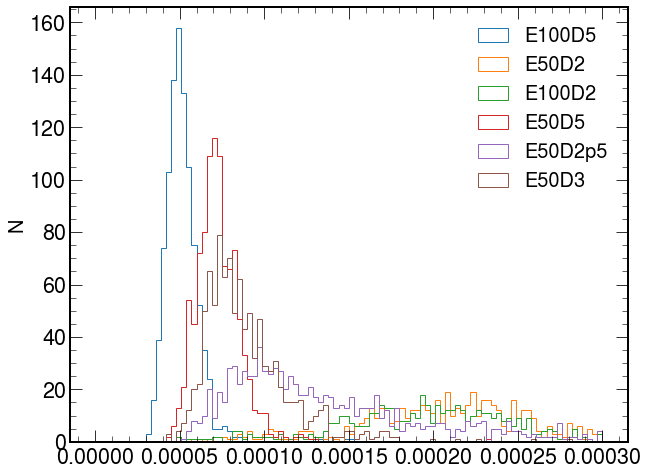

In [28]:
plt.figure(figsize=(10,8))
plotRange=(0,0.0003)
plt.hist(DeltasE100D5[:,-3], histtype="step",bins=100,range=plotRange,label='E100D5')
plt.hist(DeltasE100D2[:,-3], histtype="step",bins=100,range=plotRange,label='E100D2')
plt.hist(DeltasE50D2[:,-3], histtype="step",bins=100,range=plotRange,label='E50D2')
plt.hist(DeltasE50D5[:,-3], histtype="step",bins=100,range=plotRange,label='E50D5')
plt.hist(DeltasE50D2p5[:,-3], histtype="step",bins=100,range=plotRange,label='E50D2p5')
plt.hist(DeltasE50D3[:,-3], histtype="step",bins=100,range=plotRange,label='E50D3')
plt.legend(fontsize=20)
plt.ylabel("N",fontsize=20)
#plt.xlabel(xlabels[i],fontsize=20)
#plt.title(datasetName,fontsize=20)
#plt.xlim(min(completeShowerShapes[:,i]-5),max(completeShowerShapes[:,i]+5))
#if(savefigs):
#    plt.savefig("figures/"+folder+"/"+saveFileNames[i]+".png")
plt.show()

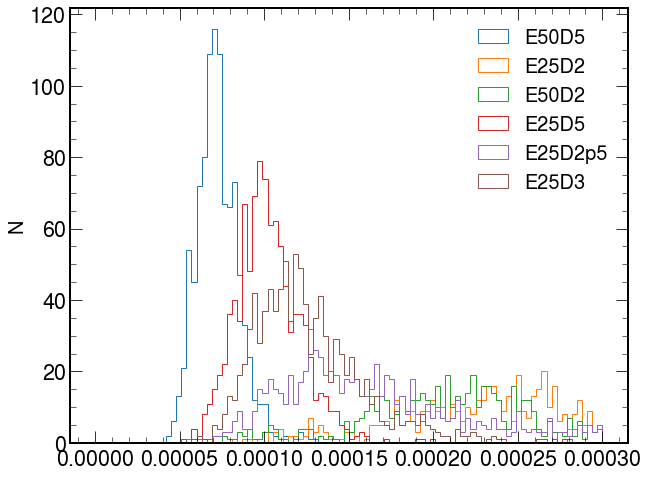

In [41]:
plt.figure(figsize=(10,8))
plotRange=(0,0.0003)
plt.hist(DeltasE50D5[:,-3], histtype="step",bins=100,range=plotRange,label='E50D5')
plt.hist(DeltasE25D2[:,-3], histtype="step",bins=100,range=plotRange,label='E25D2')
plt.hist(DeltasE50D2[:,-3], histtype="step",bins=100,range=plotRange,label='E50D2')
plt.hist(DeltasE25D5[:,-3], histtype="step",bins=100,range=plotRange,label='E25D5')
plt.hist(DeltasE25D2p5[:,-3], histtype="step",bins=100,range=plotRange,label='E25D2p5')
plt.hist(DeltasE25D3[:,-3], histtype="step",bins=100,range=plotRange,label='E25D3')
plt.legend(fontsize=20)
plt.ylabel("N",fontsize=20)
#plt.xlabel(xlabels[i],fontsize=20)
#plt.title(datasetName,fontsize=20)
#plt.xlim(min(completeShowerShapes[:,i]-5),max(completeShowerShapes[:,i]+5))
#if(savefigs):
#    plt.savefig("figures/"+folder+"/"+saveFileNames[i]+".png")
plt.show()

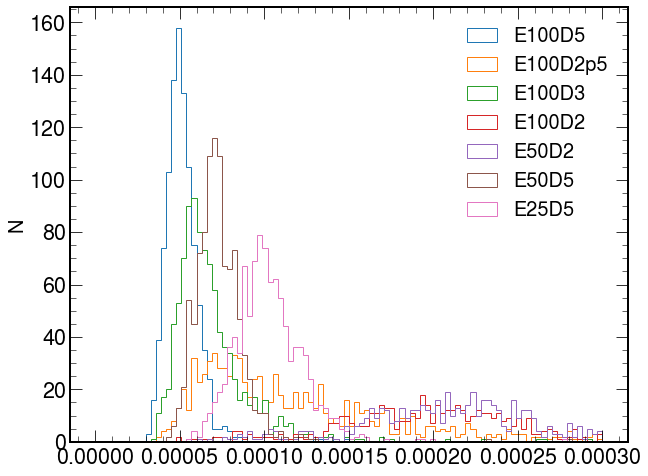

In [44]:
plt.figure(figsize=(10,8))
plotRange=(0,0.0003)
plt.hist(DeltasE100D5[:,-3], histtype="step",bins=100,range=plotRange,label='E100D5')
plt.hist(DeltasE100D2p5[:,-3], histtype="step",bins=100,range=plotRange,label='E100D2p5')
plt.hist(DeltasE100D3[:,-3], histtype="step",bins=100,range=plotRange,label='E100D3')
plt.hist(DeltasE100D2[:,-3], histtype="step",bins=100,range=plotRange,label='E100D2')
plt.hist(DeltasE50D2[:,-3], histtype="step",bins=100,range=plotRange,label='E50D2')
plt.hist(DeltasE50D5[:,-3], histtype="step",bins=100,range=plotRange,label='E50D5')
plt.hist(DeltasE25D5[:,-3], histtype="step",bins=100,range=plotRange,label='E25D5')
plt.legend(fontsize=20)
plt.ylabel("N",fontsize=20)
#plt.xlabel(xlabels[i],fontsize=20)
#plt.title(datasetName,fontsize=20)
#plt.xlim(min(completeShowerShapes[:,i]-5),max(completeShowerShapes[:,i]+5))
#if(savefigs):
#    plt.savefig("figures/"+folder+"/"+saveFileNames[i]+".png")
plt.show()

In [34]:
def plotDeltas(Deltas,labels):
    plt.figure(figsize=(8,6))
    for i in range(len(Deltas)):
        plt.hist(Deltas[i][:,-4], histtype="step",bins=100,range=(0,0.03),label=labels[i])
    plt.legend(fontsize=20)
    plt.ylabel("N",fontsize=20)
    plt.xlabel(r"$dR_{vert}$",fontsize=20)
    plt.show()

    plt.figure(figsize=(8,6))
    for i in range(len(Deltas)):
        plt.hist(Deltas[i][:,-3], histtype="step",bins=100,range=(0,0.0004),label=labels[i])
    plt.legend(fontsize=20)
    plt.ylabel("N",fontsize=20)
    plt.xlabel(r"$dR_{vert}$,EWeighted",fontsize=20)
    plt.show()

    plt.figure(figsize=(8,6))
    for i in range(len(Deltas)):
        plt.hist(Deltas[i][:,-2], histtype="step",bins=100,range=(0,0.025),label=labels[i])
    plt.legend(fontsize=20)
    plt.ylabel("N",fontsize=20)
    plt.xlabel(r"$dR_{hits}$",fontsize=20)
    plt.show()

    plt.figure(figsize=(8,6))
    for i in range(len(Deltas)):
        plt.hist(Deltas[i][:,-1], histtype="step",bins=100,range=(0.00001,0.00004),label=labels[i])
    plt.legend(fontsize=20)
    plt.ylabel("N",fontsize=20)
    plt.xlabel(r"$dR_{hits}$,EWeighted",fontsize=20)
    plt.show()

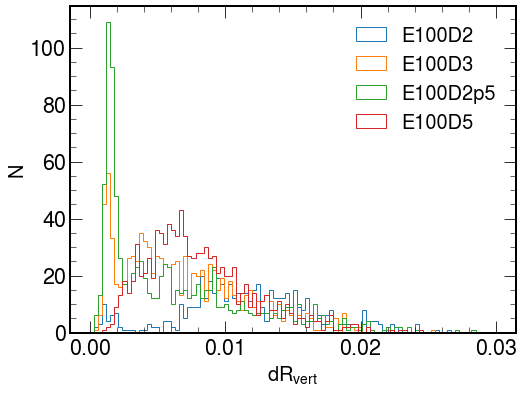

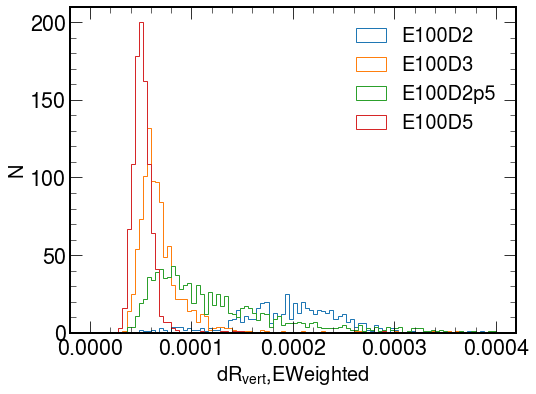

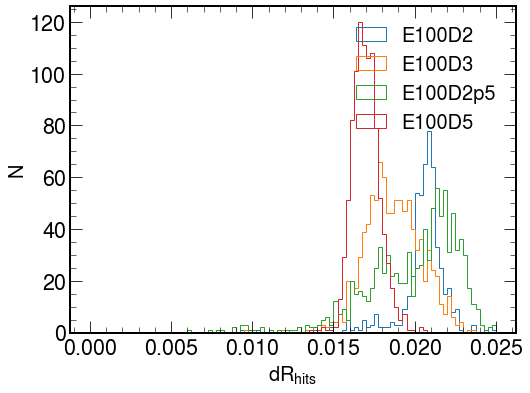

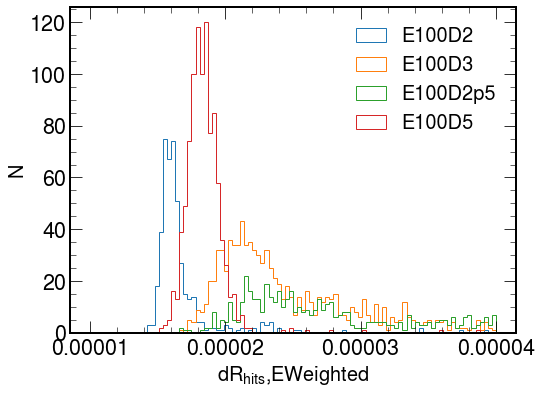

In [35]:
plotDeltas(np.asarray([DeltasE100D2,DeltasE100D3,DeltasE100D2p5,DeltasE100D5]),["E100D2","E100D3","E100D2p5","E100D5"])